**Importing Necessary Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten
from keras.models import Sequential
from keras.preprocessing import image


**Data Augmentation**

In [ ]:
train_datagen=image.ImageDataGenerator(rescale=1/255,horizontal_flip=True,zoom_range=0.2,shear_range=0.2,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,fill_mode='nearest')
test_datagen=image.ImageDataGenerator(rescale=1/225)

**Data Preprocessing**

In [ ]:
train_data=train_datagen.flow_from_directory('/content/drive/MyDrive/Covid-Detection/Train',target_size=(224,224),batch_size=16,class_mode='binary')
test_data=test_datagen.flow_from_directory('/content/drive/MyDrive/Covid-Detection/Val',target_size=(224,224),batch_size=16,class_mode='binary')

Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [ ]:
train_data.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
test_data.class_indices

{'Covid': 0, 'Normal': 1}

**CNN Model**

In [ ]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.35))

model.add(Conv2D(filters=36,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.35))

model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(units=1,activation='sigmoid'))

In [ ]:

model.compile(optimizer='Adam',loss='binary_crossentropy',metrics='accuracy')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 108, 108, 32)      18464     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 54, 54, 32)       

In [ ]:
model_history=model.fit_generator(train_data,steps_per_epoch=9,epochs=10,validation_data=test_data,validation_steps=2)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
9/9 [==============================] - 39s 4s/step - loss: 1.0294 - accuracy: 0.5061 - val_loss: 0.6880 - val_accuracy: 0.5312
Epoch 2/10
9/9 [==============================] - 36s 4s/step - loss: 0.6626 - accuracy: 0.6880 - val_loss: 0.6684 - val_accuracy: 0.8125
Epoch 3/10
9/9 [==============================] - 36s 4s/step - loss: 0.6858 - accuracy: 0.6069 - val_loss: 0.6918 - val_accuracy: 0.6250
Epoch 4/10
9/9 [==============================] - 37s 4s/step - loss: 0.6137 - accuracy: 0.7077 - val_loss: 0.6380 - val_accuracy: 0.9062
Epoch 5/10
9/9 [==============================] - 36s 4s/step - loss: 0.6107 - accuracy: 0.6527 - val_loss: 0.6353 - val_accuracy: 0.9375
Epoch 6/10
9/9 [==============================] - 36s 4s/step - loss: 0.4832 - accuracy: 0.7933 - val_loss: 0.5245 - val_accuracy: 0.9062
Epoch 7/10
9/9 [==============================] - 36s 4s/step - loss: 0.6468 - accuracy: 0.6284 - val_loss: 0.6133 - val_accuracy: 0.9062
Epoch 8/10
9/9 [==================

In [ ]:
model.metrics_names

['loss', 'accuracy']

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


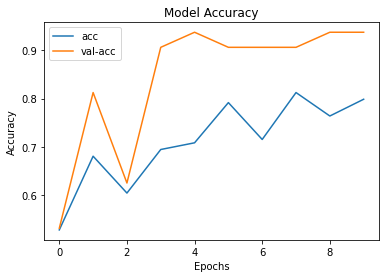

In [ ]:
print(model_history.history.keys())
plt.plot(model_history.history['accuracy'],label='acc')
plt.plot(model_history.history['val_accuracy'],label='val-acc')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

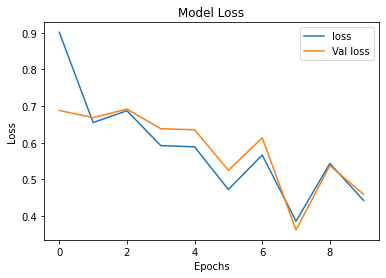

In [ ]:
plt.plot(model_history.history['loss'],label='loss')
plt.plot(model_history.history['val_loss'],label='Val loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.evaluate_generator(train_data)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.5336828827857971, 0.8526785969734192]

In [ ]:
model.evaluate_generator(test_data)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.46421369910240173, 0.9333333373069763]

In [ ]:
path="/content/drive/MyDrive/Covid-Detection/Val/Normal/NORMAL2-IM-0652-0001.jpeg"
img=image.load_img(path,target_size=(224,224))
img=image.img_to_array(img)/225
img=np.array([img])
img.shape

(1, 224, 224, 3)

In [ ]:
model.predict_classes(img)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1]], dtype=int32)

In [ ]:
import os
y_actual,y_test=[],[]
for i in os.listdir("/content/drive/MyDrive/Covid-Detection/Val/Normal"):
    img=image.load_img("/content/drive/MyDrive/Covid-Detection/Val/Normal/"+i,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    pred=model.predict_classes(img)
    y_test.append(pred[0,0])
    y_actual.append(1)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
for i in os.listdir("/content/drive/MyDrive/Covid-Detection/Val/Covid"):
    img=image.load_img("/content/drive/MyDrive/Covid-Detection/Val/Covid/"+i,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    pred=model.predict_classes(img)
    y_test.append(pred[0,0])
    y_actual.append(0)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

In [ ]:
y_test

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
y_actual

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import seaborn as sns
cn=confusion_matrix(y_actual,y_test)
print(cn)


[[29  1]
 [ 6 24]]


In [ ]:
ac=accuracy_score(y_actual,y_test)
print(ac)

0.8833333333333333


In [ ]:
cr=classification_report(y_actual,y_test)

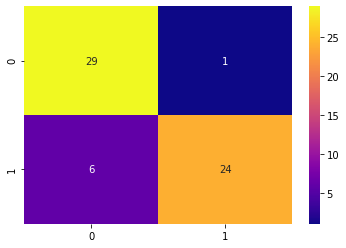

In [ ]:
sns.heatmap(cn,cmap="plasma",annot=True) #0: Covid ; 1: Normal

## **Hyperparameter Tuning**

In [ ]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(224,224,3)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(1, activation='sigmoid')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='binary_crossentropy',
              metrics=['accuracy'])
  
  return model

In [ ]:
pip install keras-tuner

In [ ]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [ ]:
train_img,train_lables = train_data.next()
test_img,test_lables = test_data.next()

In [ ]:
from keras.models import Sequential
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,executions_per_trial=3,directory='output',project_name="Covid Detection")

INFO:tensorflow:Reloading Oracle from existing project output/Covid Detection/oracle.json


In [ ]:
tuner_search.search(train_img,train_lables,
             epochs=5,
             validation_data=(test_img,test_lables),batch_size = 32)

Trial 5 Complete [00h 04m 47s]
val_accuracy: 0.5625

Best val_accuracy So Far: 0.7708333333333334
Total elapsed time: 00h 27m 37s
INFO:tensorflow:Oracle triggered exit


In [ ]:
model = tuner_search.get_best_models(num_models=1)


In [ ]:
tuner_search.results_summary()

Results summary
Results in output/Covid Detection
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
conv_1_filter: 48
conv_1_kernel: 5
conv_2_filter: 48
conv_2_kernel: 5
dense_1_units: 64
learning_rate: 0.001
Score: 0.7708333333333334
Trial summary
Hyperparameters:
conv_1_filter: 96
conv_1_kernel: 3
conv_2_filter: 48
conv_2_kernel: 5
dense_1_units: 80
learning_rate: 0.01
Score: 0.5625
Trial summary
Hyperparameters:
conv_1_filter: 112
conv_1_kernel: 3
conv_2_filter: 64
conv_2_kernel: 3
dense_1_units: 48
learning_rate: 0.001
Score: 0.5625
Trial summary
Hyperparameters:
conv_1_filter: 128
conv_1_kernel: 5
conv_2_filter: 48
conv_2_kernel: 5
dense_1_units: 96
learning_rate: 0.001
Score: 0.5625
Trial summary
Hyperparameters:
conv_1_filter: 112
conv_1_kernel: 5
conv_2_filter: 48
conv_2_kernel: 3
dense_1_units: 128
learning_rate: 0.01
Score: 0.5625


In [ ]:
model.fit_generator(train_images, train_labels, epochs=10, validation_split=0.1, initial_epoch=3)

AttributeError: ignored